In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import linear_model
%matplotlib inline

In [2]:
student_data = pd.read_csv("student_education_data.csv")


In [3]:
student_data

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,PrimaryGuardian,RaisedHand,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Performance
0,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Average
1,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Average
2,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,Below Average
3,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,Below Average
4,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,Below Average
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,Average
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,Average
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,Below Average


In [4]:
#Students from Kuwait and Jordan birthplaces made a majority of the students, will serve as our sample populations

Kuwait_Students = student_data.loc[student_data["PlaceofBirth"]=="Kuwait"]
Kuwait_Students


,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,PrimaryGuardian,RaisedHand,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Performance
0,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Average
1,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Average
2,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,Below Average
3,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,Below Average
4,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,F,Kuwait,Kuwait,PrimarySchool,G-04,A,History,S,Father,80,97,86,95,Yes,Good,Under-7,Average
259,M,Kuwait,Kuwait,PrimarySchool,G-04,A,English,S,Mother,69,34,12,17,No,Bad,Above-7,Below Average
260,M,Kuwait,Kuwait,PrimarySchool,G-04,A,History,S,Father,10,17,12,14,No,Bad,Above-7,Below Average
261,M,Kuwait,Kuwait,PrimarySchool,G-04,A,History,S,Father,61,97,82,64,Yes,Bad,Above-7,Average


In [5]:
student_data.describe()


,RaisedHand,VisitedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
len(Kuwait_Students)

180

In [7]:
#School Age Group as categorization of students

Kuwait_StudentsPrimary = Kuwait_Students.loc[Kuwait_Students["StageID"]=="PrimarySchool"]
Kuwait_StudentsMiddle = Kuwait_Students.loc[Kuwait_Students["StageID"]=="MiddleSchool"]
Kuwait_StudentsHigh = Kuwait_Students.loc[Kuwait_Students["StageID"]=="Highschool"]

In [8]:
# Unique command to see how many unique subjects consisted within the groups of students

Kuwait_StudentsPrimary["Topic"].unique()


array(['IT', 'English', 'French', 'Math', 'Science', 'Arabic', 'History'],
      dtype=object)

In [9]:
#Separated the data based of subjects/topic

it = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="IT"]

english = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="English"]

math = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="Math"]

science = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="Science"] 

history = Kuwait_StudentsPrimary.loc[Kuwait_StudentsPrimary["Topic"]=="History"]



In [10]:
len(Kuwait_StudentsPrimary)
len(it)

54

In [11]:
it

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,PrimaryGuardian,RaisedHand,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Performance
0,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,Average
1,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,Average
2,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,Below Average
3,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,Below Average
4,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,Average
5,F,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,Average
12,M,Kuwait,Kuwait,PrimarySchool,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,Below Average
81,M,Kuwait,Kuwait,PrimarySchool,G-02,A,IT,F,Father,8,25,1,70,No,Bad,Above-7,Below Average
82,M,Kuwait,Kuwait,PrimarySchool,G-02,B,IT,F,Father,7,5,2,80,Yes,Good,Above-7,Below Average
83,M,Kuwait,Kuwait,PrimarySchool,G-02,B,IT,F,Father,7,4,10,50,No,Good,Above-7,Average


In [12]:
#Grab the count to display gender distribution

count_student_male = len(it.loc[it["Gender"]=="M"])
count_student_female = len(it) - count_student_male

Text(0.5, 1.0, 'Kuwait PrimarySchool IT Gender Distribution')

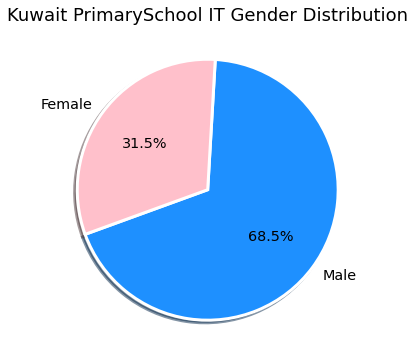

In [13]:
#Gender distribution for Kuwait IT primary school

student_count = [count_student_male, count_student_female]
labels = ["Male", "Female"]
colors = ["dodgerblue", "pink"]

fig, ax = plt.subplots(figsize=(6,6))

patches, texts, pcts = ax.pie ( 
    student_count, labels=labels, autopct="%.1f%%", 
    wedgeprops={"linewidth": 3.0, "edgecolor": "white"},
    textprops={"size": "x-large"},
    startangle=200, 
    shadow = True,
    colors = colors)

ax.set_title("Kuwait PrimarySchool IT Gender Distribution", fontsize = 18)



In [14]:
#Separated Columns by Gender and Performance Category

Male_Below_Average = it.loc[(it["Gender"]== "M") & (it["Performance"]=="Below Average")]
Male_Average = it.loc[(it["Gender"]== "M") & (it["Performance"]=="Average")]
Male_Above_Average = it.loc[(it["Gender"]== "M") & (it["Performance"]=="Above Average")]

Female_Below_Average = it.loc[(it["Gender"]== "F") & (it["Performance"]=="Below Average")]
Female_Average = it.loc[(it["Gender"]== "F") & (it["Performance"]=="Average")]
Female_Above_Average = it.loc[(it["Gender"]== "F") & (it["Performance"]=="Above Average")]

In [15]:
#Collected Individual Averages of columns in order to graph 

MB_Raised_Hand_Avg = (sum(Male_Below_Average["RaisedHand"].to_numpy())) / len(Male_Below_Average["RaisedHand"].to_numpy())
MB_Visited_Res_Avg = (sum(Male_Below_Average["VisitedResources"].to_numpy()) / len(Male_Below_Average["VisitedResources"].to_numpy()))
MB_Discussion_Avg = (sum(Male_Below_Average["Discussion"].to_numpy())) / len(Male_Below_Average["Discussion"].to_numpy())

FB_Raised_Hand_Avg = (sum(Female_Below_Average["RaisedHand"].to_numpy())) / len(Female_Below_Average["RaisedHand"].to_numpy())
FB_Visited_Res_Avg = (sum(Female_Below_Average["VisitedResources"].to_numpy()) / len(Female_Below_Average["VisitedResources"].to_numpy()))
FB_Discussion_Avg = (sum(Female_Below_Average["Discussion"].to_numpy())) / len(Female_Below_Average["Discussion"].to_numpy())

In [16]:
#Data Collection

below_male_data = [MB_Raised_Hand_Avg, MB_Visited_Res_Avg, MB_Discussion_Avg]
below_female_data = [FB_Raised_Hand_Avg, FB_Visited_Res_Avg, FB_Discussion_Avg]

below_average_students = it.loc[it["Performance"] == "Below Average"]
attendance = Counter(below_average_students["StudentAbsenceDays"])
absences = ["Under 7 Days", "Above 7 Days"]
counts = [attendance["Under-7"], attendance["Above-7"]]

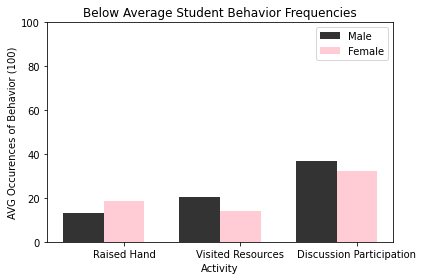

In [17]:
#Graph Data For Below Average Students

groups = 3

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = .35
opacity = .8

first_rect = plt.bar(index, below_male_data, bar_width,
                     alpha = opacity,
                     color = "black",
                     label = "Male")

second_rect = plt.bar(index + bar_width, below_female_data, bar_width,
                     alpha = opacity,
                     color = "pink",
                     label = "Female")

plt.xlabel("Activity")
plt.ylabel("AVG Occurences of Behavior (100)")
plt.title("Below Average Student Behavior Frequencies")
plt.xticks(index + bar_width, ('Raised Hand', 'Visited Resources', 'Discussion Participation'))
plt.ylim([0, 100])
plt.legend()
plt.tight_layout()



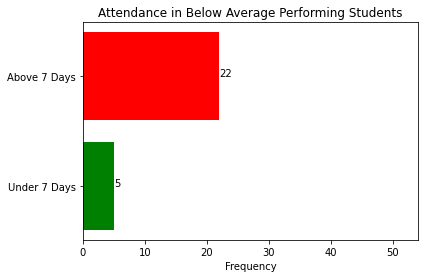

In [18]:
plt.title("Attendance in Below Average Performing Students")
plt.barh(absences, counts, color=["Green", "Red"])
plt.xlim([0, 54])
plt.xlabel("Frequency")
for index, value in enumerate(counts):
    plt.text(value, index, str(value))


In [19]:
#Data Averages Calculated for above average performing students

MA_Raised_Hand_Avg = (sum(Male_Above_Average["RaisedHand"].to_numpy())) / len(Male_Above_Average["RaisedHand"].to_numpy())
MA_Visited_Res_Avg = (sum(Male_Above_Average["VisitedResources"].to_numpy()) / len(Male_Above_Average["VisitedResources"].to_numpy()))
MA_Discussion_Avg = (sum(Male_Above_Average["Discussion"].to_numpy())) / len(Male_Above_Average["Discussion"].to_numpy())

FA_Raised_Hand_Avg = (sum(Female_Above_Average["RaisedHand"].to_numpy())) / len(Female_Above_Average["RaisedHand"].to_numpy())
FA_Visited_Res_Avg = (sum(Female_Above_Average["VisitedResources"].to_numpy()) / len(Female_Above_Average["VisitedResources"].to_numpy()))
FA_Discussion_Avg = (sum(Female_Above_Average["Discussion"].to_numpy())) / len(Female_Above_Average["Discussion"].to_numpy())

In [20]:
#Data organized and attendance behavior recorded for displaying

above_male_data = [MA_Raised_Hand_Avg, MA_Visited_Res_Avg, MA_Discussion_Avg]
above_female_data = [FA_Raised_Hand_Avg, FA_Visited_Res_Avg, FA_Discussion_Avg]

above_average_students = it.loc[it["Performance"] == "Above Average"]

attendance = Counter(above_average_students["StudentAbsenceDays"])
absences = ["Under 7 Days", "Above 7 Days"]
counts = [attendance["Under-7"], attendance["Above-7"]]

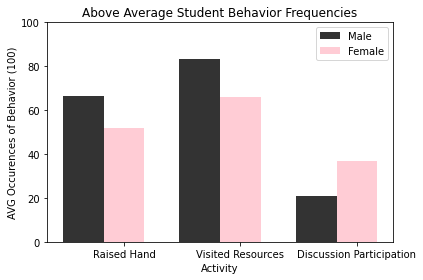

In [21]:
#Graph Data For Above Average Students

groups = 3

fig, ax = plt.subplots()
index = np.arange(groups)
bar_width = .35
opacity = .8

first_rect = plt.bar(index, above_male_data, bar_width,
                     alpha = opacity,
                     color = "black",
                     label = "Male")

second_rect = plt.bar(index + bar_width, above_female_data, bar_width,
                     alpha = opacity,
                     color = "pink",
                     label = "Female")

plt.xlabel("Activity")
plt.ylabel("AVG Occurences of Behavior (100)")
plt.title("Above Average Student Behavior Frequencies")
plt.xticks(index + bar_width, ('Raised Hand', 'Visited Resources', 'Discussion Participation'))
plt.ylim([0, 100])
plt.legend()
plt.tight_layout()


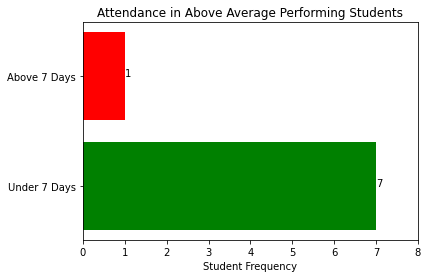

In [22]:
#Attendance Behavior in Above Average Performace Students

plt.title("Attendance in Above Average Performing Students")
plt.barh(absences, counts, color=["Green", "Red"])
plt.xlim([0, 8])
plt.xlabel("Student Frequency")
for index, value in enumerate(counts):
    plt.text(value, index, str(value))


In [23]:
len(it)

54

In [47]:
it_regression_data = it[["Gender", "PrimaryGuardian", "ParentAnsweringSurvey", "RaisedHand", "VisitedResources", "AnnouncementsView", "Discussion", "StudentAbsenceDays", "Performance"]]

it_regression_data

,Gender,PrimaryGuardian,ParentAnsweringSurvey,RaisedHand,VisitedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Performance
0,M,Father,Yes,15,16,2,20,Under-7,Average
1,M,Father,Yes,20,20,3,25,Under-7,Average
2,M,Father,No,10,7,0,30,Above-7,Below Average
3,M,Father,No,30,25,5,35,Above-7,Below Average
4,M,Father,No,40,50,12,50,Above-7,Average
5,F,Father,Yes,42,30,13,70,Above-7,Average
12,M,Father,No,5,1,0,11,Above-7,Below Average
81,M,Father,No,8,25,1,70,Above-7,Below Average
82,M,Father,Yes,7,5,2,80,Above-7,Below Average
83,M,Father,No,7,4,10,50,Above-7,Average


In [82]:
x = it_regression_data.drop("Performance", axis=1)
y = ["Performance"]

In [89]:
x = pd.get_dummies(x, drop_first=True)

x.rename(columns={"Gender_M": "Gender_Male", 
                  "PrimaryGuardian_Mother": "Primary_Guardian_Mother", 
                  "ParentAnsweringSurvey_Yes": "GuardianAnsweredSurvey",
                  "StudentAbsenceDays_Under-7": "AbsencesUnder7Days"}, errors="raise")

,RaisedHand,VisitedResources,AnnouncementsView,Discussion,Gender_Male,Primary_Guardian_Mother,GuardianAnsweredSurvey,AbsencesUnder7Days
0,15,16,2,20,1,0,1,1
1,20,20,3,25,1,0,1,1
2,10,7,0,30,1,0,0,0
3,30,25,5,35,1,0,0,0
4,40,50,12,50,1,0,0,0
5,42,30,13,70,0,0,1,0
12,5,1,0,11,1,0,0,0
81,8,25,1,70,1,0,0,0
82,7,5,2,80,1,0,1,0
83,7,4,10,50,1,0,0,0
